In [40]:
import pandas as pd
import numpy as np
import random

In [41]:
all_data = pd.read_csv('stock_data.csv')
# all_data

Create a new dataframe using 20 randomly selected companies

In [42]:
unique_companies = all_data['Name'].unique()
selected_companies = random.sample(unique_companies.tolist(),20)

data = all_data[all_data['Name'].isin(selected_companies)]

data.tail

data.dtypes

Date              object
Code              object
Name              object
12m Low           object
12m High          object
Day Low           object
Day High          object
Day Price         object
Previous          object
Change            object
Change%           object
Volume            object
Adjusted Price    object
dtype: object

DO THE TYPE CONVERSIONS

In [43]:
#Convert to datetime
data.loc[:, 'Date'] = data['Date'].astype('datetime64[ns]')


# Convert to categorical
data.loc[:, 'Name'] = data['Name'].astype('category')
data.loc[:, 'Code'] = data['Code'].astype('category')

# Convert to float
columns_to_convert = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Change%', 'Adjusted Price', 'Volume']

for i in columns_to_convert:
    data.loc[:, i] = pd.to_numeric(data[i].astype(str).str.replace(',', ''), errors='coerce')


/tmp/ipykernel_5123/3346842627.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.loc[:, 'Date'] = data['Date'].astype('datetime64[ns]')


In [44]:
#REMOVE THE DASHES IN CHANGE COLUMN AND CALCULATE THE VALUE FOR EMPTY CELLS

#Calculate change for empty values
data.loc[:, 'Change'] = data['Day Price'].astype(float) - data['Previous'].astype(float)

#replace `-` in Change with null
data.loc[:, 'Change'] = data['Change'].replace('-', np.nan)

#Calculate Change% for empty values
data.loc[:, 'Change%'] = (data['Change'] / data['Previous']) * 100
data.head(5)
# data




,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2022-01-03 00:00:00,EGAD,Eaagads Ltd,10.0,15.0,13.5,13.8,13.5,13.5,0.0,0.0,4000.0,NaN
1,2022-01-03 00:00:00,KUKZ,Kakuzi Plc,355.0,427.0,385.0,385.0,385.0,385.0,0.0,0.0,NaN,NaN
6,2022-01-03 00:00:00,CGEN,Car and General (K) Ltd,10.0,70.0,33.95,33.95,33.95,33.95,0.0,0.0,NaN,16.98
18,2022-01-03 00:00:00,SCBK,Standard Chartered Bank Kenya Ltd,123.0,148.75,130.0,131.0,130.0,128.25,1.75,1.364522,3300.0,NaN
20,2022-01-03 00:00:00,EVRD,Eveready East Africa Ltd,0.77,1.27,1.04,1.07,1.05,0.98,0.07,7.142857,21200.0,NaN


HANDLE ALL THE MISSING VALUES

In [45]:
null_counts = data.isnull().sum()
columns_with_null = null_counts[null_counts > 0]

columns_with_null

Volume             728
Adjusted Price    1981
dtype: int64

In [46]:
# Find the indices of the columns you want to replace
volume_index = data.columns.get_loc('Volume')
adjusted_price_index = data.columns.get_loc('Adjusted Price')

# Create a list of column indices to replace
columns_to_replace_indices = [volume_index, adjusted_price_index]

# Select columns to replace using iloc
columns_to_replace = data.iloc[:, columns_to_replace_indices]

# Calculate means
columns_to_replace_means = columns_to_replace.mean()

# Replace NaN values with means
data.iloc[:, columns_to_replace_indices] = columns_to_replace.fillna(columns_to_replace_means)


In [47]:
data.head(30)

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2022-01-03 00:00:00,EGAD,Eaagads Ltd,10.0,15.0,13.5,13.8,13.5,13.5,0.0,0.0,4000.0,29.638475
1,2022-01-03 00:00:00,KUKZ,Kakuzi Plc,355.0,427.0,385.0,385.0,385.0,385.0,0.0,0.0,548756.859756,29.638475
6,2022-01-03 00:00:00,CGEN,Car and General (K) Ltd,10.0,70.0,33.95,33.95,33.95,33.95,0.0,0.0,548756.859756,16.98
18,2022-01-03 00:00:00,SCBK,Standard Chartered Bank Kenya Ltd,123.0,148.75,130.0,131.0,130.0,128.25,1.75,1.364522,3300.0,29.638475
20,2022-01-03 00:00:00,EVRD,Eveready East Africa Ltd,0.77,1.27,1.04,1.07,1.05,0.98,0.07,7.142857,21200.0,29.638475
22,2022-01-03 00:00:00,HBE,Homeboyz Entertainment Plc,4.66,4.66,4.66,4.66,4.66,4.66,0.0,0.0,548756.859756,29.638475
24,2022-01-03 00:00:00,LKL,Longhorn Publishers Plc,3.26,4.6,3.96,4.0,3.97,4.0,-0.03,-0.75,800.0,29.638475
28,2022-01-03 00:00:00,SGL,Standard Group Plc,11.9,20.0,13.55,13.55,13.55,13.55,0.0,0.0,548756.859756,29.638475
34,2022-01-03 00:00:00,CRWN,Crown Paints Kenya Plc,19.05,42.8,30.5,30.5,30.5,30.5,0.0,0.0,548756.859756,29.638475
35,2022-01-03 00:00:00,CABL,East African Cables Ltd,0.9,1.62,1.18,1.32,1.23,1.2,0.03,2.5,2200.0,29.638475


In [48]:
missing_values = data.isnull().sum()

# Display the columns with missing values and the number of missing values in each
print(missing_values)



Date              0
Code              0
Name              0
12m Low           0
12m High          0
Day Low           0
Day High          0
Day Price         0
Previous          0
Change            0
Change%           0
Volume            0
Adjusted Price    0
dtype: int64


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
# data = pd.read_csv('stock_data.csv')
# Replace 'your_data.csv' with the actual file path if you're loading from a CSV file

# Step 1: Filter Data for the Chosen Company (e.g., 'EGAD')
chosen_company_code = 'EGAD'
chosen_company_data = data[data['Code'] == chosen_company_code]

# Step 2: Prepare Features and Target for the Chosen Company
X_columns_chosen = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Change%']
y_columns_chosen = ['Volume']
X_chosen = chosen_company_data[X_columns_chosen]
y_chosen = chosen_company_data[y_columns_chosen]


print(X_chosen)

print(y_chosen)

print(chosen_company_data)

     12m Low 12m High Day Low Day High Day Price Previous Change   Change%
0       10.0     15.0    13.5     13.8      13.5     13.5    0.0       0.0
66      10.0     15.0   12.85    12.85     12.85     13.5  -0.65 -4.814815
132     10.0     15.0   12.85    12.85     12.85    12.85    0.0       0.0
198     10.0     15.0    13.8     13.8      13.8    12.85   0.95  7.392996
264     10.0     15.0    13.8     13.8      13.8     13.8    0.0       0.0
...      ...      ...     ...      ...       ...      ...    ...       ...
6402    10.0     15.0   13.45    13.45     13.45    13.45    0.0       0.0
6468    10.0     15.0   13.45    13.45     13.45    13.45    0.0       0.0
6534    10.0     15.0   13.45    13.45     13.45    13.45    0.0       0.0
6600    10.0    14.95   13.45    13.45     13.45    13.45    0.0       0.0
6666    10.0    14.95   13.45    13.45     13.45    13.45    0.0       0.0

[102 rows x 8 columns]
             Volume
0            4000.0
66            600.0
132   548756.859

/home/kimu/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/kimu/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/kimu/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/kimu/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error for Chosen Company: 107368.48681920527
Mean Squared Error for Chosen Company: 22302890265.873016
Root Mean Squared Error for Chosen Company: 149341.52224305543


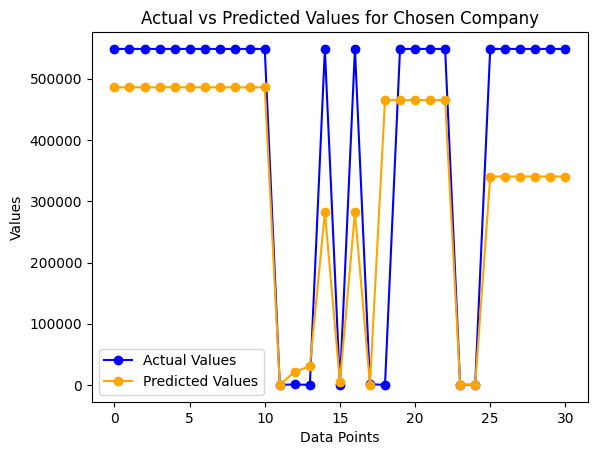


Feature Importance:
     Feature  Importance
1     Change    0.409624
2    Change%    0.377514
0  Day Price    0.212862


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
# data = pd.read_csv('stock_data.csv')
# Replace 'your_data.csv' with the actual file path if you're loading from a CSV file

# Step 1: Filter Data for the Chosen Company (e.g., 'EGAD')
chosen_company_code = 'EGAD'
chosen_company_data = data[data['Code'] == chosen_company_code]

# Step 2: Prepare Features and Target for the Chosen Company
# X_columns_chosen = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Change%']
X_columns_chosen = [ 'Day Price', 'Change', 'Change%']
y_columns_chosen = ['Volume']
X_chosen = chosen_company_data[X_columns_chosen]
y_chosen = chosen_company_data[y_columns_chosen]

# Step 3: Train-Test Split for the Chosen Company
X_train_chosen, X_test_chosen, y_train_chosen, y_test_chosen = train_test_split(X_chosen, y_chosen, test_size=0.3, random_state=42, shuffle=False)

# Step 4: Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_regressor_chosen = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor_chosen, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_chosen, y_train_chosen)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the model with the best hyperparameters
rf_regressor_chosen = RandomForestRegressor(**best_params, random_state=42)
rf_regressor_chosen.fit(X_train_chosen, y_train_chosen)
predictions_chosen = rf_regressor_chosen.predict(X_test_chosen)

# Evaluate the model
mae_chosen = metrics.mean_absolute_error(y_test_chosen, predictions_chosen)
mse_chosen = metrics.mean_squared_error(y_test_chosen, predictions_chosen)
rmse_chosen = np.sqrt(mse_chosen)
print(f'Mean Absolute Error for Chosen Company: {mae_chosen}')
print(f'Mean Squared Error for Chosen Company: {mse_chosen}')
print(f'Root Mean Squared Error for Chosen Company: {rmse_chosen}')

# Step 5: Plot Actual vs Predicted Values for the Chosen Company
index_chosen = np.arange(len(y_test_chosen))
plt.plot(index_chosen, y_test_chosen, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(index_chosen, predictions_chosen, label='Predicted Values', marker='o', linestyle='-', color='orange')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for Chosen Company')
plt.legend()
plt.show()

# Feature Importance
feature_importance = rf_regressor_chosen.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_columns_chosen, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)


Mean Absolute Error for Chosen Company: 2412884415369.928
Mean Squared Error for Chosen Company: 9.024115804266934e+25
Root Mean Squared Error for Chosen Company: 9499534622425.95


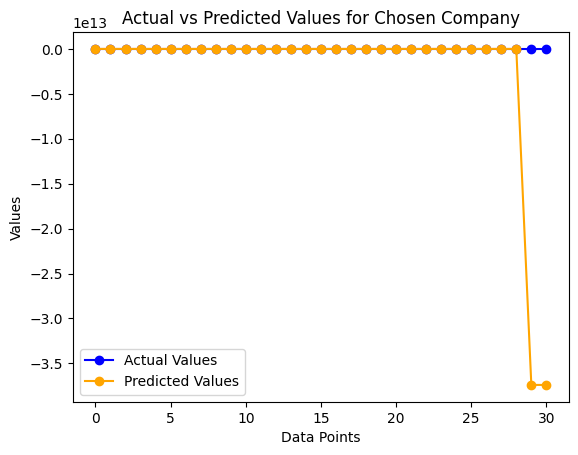

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
# data = pd.read_csv('stock_data.csv')
# Replace 'your_data.csv' with the actual file path if you're loading from a CSV file

# Step 1: Filter Data for the Chosen Company (e.g., 'EGAD')
chosen_company_code = 'EGAD'
chosen_company_data = data[data['Code'] == chosen_company_code]

# Step 2: Prepare Features and Target for the Chosen Company
# X_columns_chosen = ['Day Price', 'Change', 'Change%']
X_columns_chosen = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Change%']
y_columns_chosen = ['Volume']
X_chosen = chosen_company_data[X_columns_chosen]
y_chosen = chosen_company_data[y_columns_chosen]

# Step 3: Train-Test Split for the Chosen Company
X_train_chosen, X_test_chosen, y_train_chosen, y_test_chosen = train_test_split(X_chosen, y_chosen, test_size=0.3, random_state=42, shuffle=False)

# Step 4: Train the Linear Regression Model
linear_regressor_chosen = LinearRegression()
linear_regressor_chosen.fit(X_train_chosen, y_train_chosen)
predictions_chosen = linear_regressor_chosen.predict(X_test_chosen)

# Evaluate the model
mae_chosen = metrics.mean_absolute_error(y_test_chosen, predictions_chosen)
mse_chosen = metrics.mean_squared_error(y_test_chosen, predictions_chosen)
rmse_chosen = np.sqrt(mse_chosen)
print(f'Mean Absolute Error for Chosen Company: {mae_chosen}')
print(f'Mean Squared Error for Chosen Company: {mse_chosen}')
print(f'Root Mean Squared Error for Chosen Company: {rmse_chosen}')

# Step 5: Plot Actual vs Predicted Values for the Chosen Company
index_chosen = np.arange(len(y_test_chosen))
plt.plot(index_chosen, y_test_chosen, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(index_chosen, predictions_chosen, label='Predicted Values', marker='o', linestyle='-', color='orange')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for Chosen Company')
plt.legend()
plt.show()

# Note: Linear regression doesn't provide feature importances like RandomForestRegressor


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
# data = pd.read_csv('stock_data.csv')
# Replace 'your_data.csv' with the actual file path if you're loading from a CSV file

# Step 1: Filter Data for the Chosen Company (e.g., 'EGAD')
chosen_company_code = 'EGAD'
chosen_company_data = data[data['Code'] == chosen_company_code]

# Step 2: Prepare Features and Target for the Chosen Company
X_columns_chosen = ['Day Price', 'Change', 'Change%']
y_columns_chosen = ['Day Price']  # Predicting next day's price
X_chosen = chosen_company_data[X_columns_chosen]
y_chosen = chosen_company_data[y_columns_chosen]

# Step 3: Shift the target variable to represent the next day's price
y_chosen = y_chosen.shift(-1)

# Step 4: Train-Test Split for the Chosen Company
X_train_chosen, X_test_chosen, y_train_chosen, y_test_chosen = train_test_split(X_chosen, y_chosen, test_size=0.3, random_state=42, shuffle=False)

# Step 5: Train the Linear Regression Model
linear_regressor_chosen = LinearRegression()
linear_regressor_chosen.fit(X_train_chosen, y_train_chosen)
predictions_chosen = linear_regressor_chosen.predict(X_test_chosen)

# Evaluate the model
mae_chosen = metrics.mean_absolute_error(y_test_chosen, predictions_chosen)
mse_chosen = metrics.mean_squared_error(y_test_chosen, predictions_chosen)
rmse_chosen = np.sqrt(mse_chosen)
print(f'Mean Absolute Error for Chosen Company: {mae_chosen}')
print(f'Mean Squared Error for Chosen Company: {mse_chosen}')
print(f'Root Mean Squared Error for Chosen Company: {rmse_chosen}')

# Step 6: Compare Actual vs Predicted Values for the Chosen Company
comparison_df = pd.DataFrame({'Actual': y_test_chosen, 'Predicted': predictions_chosen})
comparison_df['Date'] = chosen_company_data.index[-len(y_test_chosen):]  # Assuming the DataFrame has a datetime index
comparison_df.set_index('Date', inplace=True)

# Step 7: Plot Actual vs Predicted Values for the Chosen Company
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted Values', marker='o', linestyle='-', color='orange')

plt.xlabel('Date')
plt.ylabel('Day Price')
plt.title('Actual vs Predicted Values for Chosen Company')
plt.legend()
plt.show()


ValueError: Input contains NaN.

Mean Absolute Error for Chosen Company: 0.06005459299223948
Mean Squared Error for Chosen Company: 0.020673569391784483
Root Mean Squared Error for Chosen Company: 0.14378306364723378


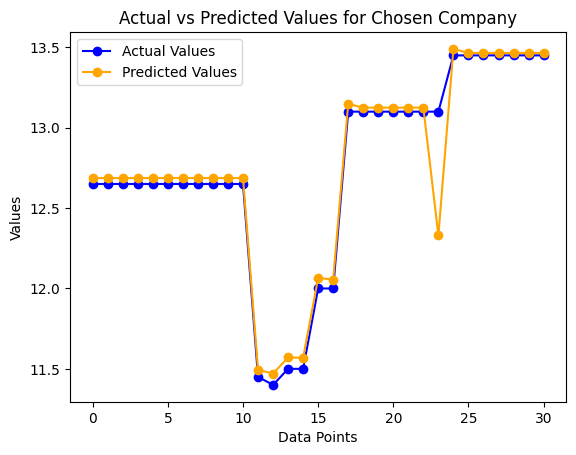

ValueError: Per-column arrays must each be 1-dimensional

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
# Replace 'your_data.csv' with the actual file path if you're loading from a CSV file

# Step 1: Filter Data for the Chosen Company (e.g., 'EGAD')
chosen_company_code = 'EGAD'
chosen_company_data = data[data['Code'] == chosen_company_code]

# Step 2: Prepare Features and Target for the Chosen Company
X_columns_chosen = ['Day Price', 'Change', 'Change%']
y_columns_chosen = ['Day High']
X_chosen = chosen_company_data[X_columns_chosen]
y_chosen = chosen_company_data[y_columns_chosen]

# Step 3: Train-Test Split for the Chosen Company
X_train_chosen, X_test_chosen, y_train_chosen, y_test_chosen = train_test_split(X_chosen, y_chosen, test_size=0.3, random_state=42, shuffle=False)

# Step 4: Train the Linear Regression Model
linear_regressor_chosen = LinearRegression()
linear_regressor_chosen.fit(X_train_chosen, y_train_chosen)
predictions_chosen = linear_regressor_chosen.predict(X_test_chosen)

# Handle NaN values in predictions
predictions_chosen = np.nan_to_num(predictions_chosen, nan=0)  # Replace NaN values with 0

# Handle NaN values in y_test_chosen
y_test_chosen = np.nan_to_num(y_test_chosen, nan=0)  # Replace NaN values with 0

# Evaluate the model
mae_chosen = metrics.mean_absolute_error(y_test_chosen, predictions_chosen)
mse_chosen = metrics.mean_squared_error(y_test_chosen, predictions_chosen)
rmse_chosen = np.sqrt(mse_chosen)
print(f'Mean Absolute Error for Chosen Company: {mae_chosen}')
print(f'Mean Squared Error for Chosen Company: {mse_chosen}')
print(f'Root Mean Squared Error for Chosen Company: {rmse_chosen}')

# Plot Actual vs Predicted Values for the Chosen Company
index_chosen = np.arange(len(y_test_chosen))
plt.plot(index_chosen, y_test_chosen, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(index_chosen, predictions_chosen, label='Predicted Values', marker='o', linestyle='-', color='orange')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for Chosen Company')
plt.legend()
plt.show()

# Feature Coefficients
coefficients = linear_regressor_chosen.coef_
feature_coefficients_df = pd.DataFrame({'Feature': X_columns_chosen, 'Coefficient': coefficients})
feature_coefficients_df = feature_coefficients_df.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(feature_coefficients_df)
